In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

# 1. Business understanding
We are analyzing the student performance dataset to understand what factors affect the students performance the most, can we predict the final grade of a student based on the other features in the dataset and how different learning styles affect the performance of the student. We will use the following columns to predict the final grade of a student:

In [3]:
df = pd.read_csv('./datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#plot age and weight distribution

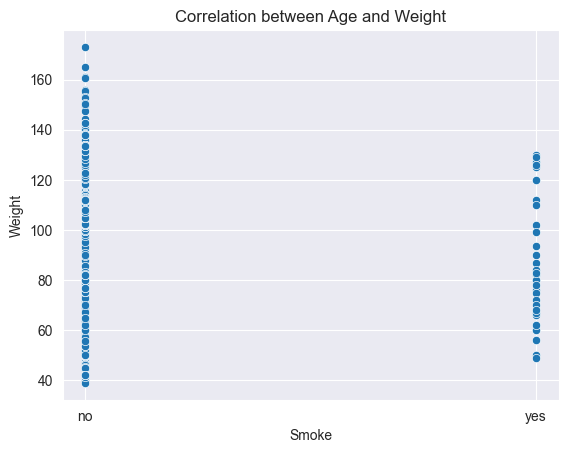


# 2. Data understanding
The data is pulled from Kaggle and created by Adil Shahim (https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style). The dataset contains the following columns:

- **Student_ID** – Unique identifier for each student
- **Age** – Student's age (18-30 years)
- **Gender** – Male, Female, or Other
- **Study_Hours_per_Week** – Hours spent studying per week (5-50 hours)
- **Preferred_Learning_Style** – Visual, Auditory, Reading/Writing, Kinesthetic
- **Online_Courses_Completed** – Number of online courses completed (0-20)
- **Participation_in_Discussions** – Whether the student actively participates in discussions (Yes/No)
- **Assignment_Completion_Rate (%)** – Percentage of assignments completed (50%-100%)
- **Exam_Score (%)** – Student’s final exam score (40%-100%)
- **Attendance_Rate (%)** – Percentage of classes attended (50%-100%)
- **Use_of_Educational_Tech** – Whether the student uses educational technology (Yes/No)
- **Self_Reported_Stress_Level** – Student’s stress level (Low, Medium, High)
- **Time_Spent_on_Social_Media** (hours/week) – Weekly hours spent on social media (0-30 hours)
- **Sleep_Hours_per_Night** – Average sleep duration (4-10 hours)
- **Final_Grade** – Assigned grade based on exam score (A, B, C, D, F)

The dataset does not contain missing values by default. However, we will check for missing values and duplicates in the dataset just to be sure.

# 3. Data preparation
We will check for missing values and duplicates in the dataset. We will also check for unique values in each column to ensure that the data is clean and ready for analysis. We will also map the categorical and boolean values to numerical values for easier analysis. We standardize the values for seeing

In [4]:
print(df.describe()) # Summary statistics

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [5]:
missing_values = df.isnull().sum() # Check for missing values
print(missing_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Mapping categorical and boolean values to numerical values.

In [6]:
# df["Student_ID"] = df["Student_ID"].str[1:].astype('int') # Converting student IDs to integers from (S0001, S0002, S0003, ...) to (1, 2, 3, ...)
df = pd.get_dummies(df, columns=["Gender"], drop_first=True) # One hot encoding for Gender
df = pd.get_dummies(df, columns=["Preferred_Learning_Style"], drop_first=True) # One hot encoding for preferred learning style
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].map({"Yes": 1, "No": 0})
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].map({"Yes": 1, "No": 0})
df["Self_Reported_Stress_Level"] = df["Self_Reported_Stress_Level"].map({"Low" : 1, "Medium" : 2, "High" : 3}); # Mapping stress levels by numbers
df["Final_Grade"] = df["Final_Grade"].astype("category")

KeyError: "None of [Index(['Preferred_Learning_Style'], dtype='object')] are in the [columns]"

## 4. Modelling
We will use the decision trees to see which features affect the final grade of a student the most.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.metrics import recall_score, classification_report

X = df.drop(['Final_Grade', 'Exam_Score (%)', "Participation_in_Discussions", "Gender_Male", "Gender_Other"], axis = 1) # input features
y = df['Final_Grade'].astype('category') # target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # check the shape of the train and test sets

model = DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=20)
model.fit(X_train, y_train) # fit the model

fig = plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = X.keys(), class_names = ['A', 'B', 'C', 'D'])
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance / Top 10 most important features")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Predictions on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Recall (you already have this)
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' handles class imbalance
print("Recall Score:", recall)

# Full classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()